# Israeli Settlements Growth in the West Bank

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [183]:
df= pd.read_csv('database.csv',usecols=[0,2,3,4,5,6,7,8,9,10])
#convert columns names
year_mapping = {'2000 Population':2000,'2005 Population':2005,'2010 Population':2010,'2015 Population':2015}
def convert_column_name(c):
    if c in year_mapping:
        return year_mapping[c]
    
    return c.lower().replace(' ','_')

df.columns = [convert_column_name(x) for x in df.columns]
df.head()

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
0,Adora,1984,Har Hebron,31.5522,35.0189,East,404.0,240.0,206.0,271.0
1,Alei Zahav,1982,Shomron,32.0717,35.0642,West,1300.0,498.0,684.0,391.0
2,Alfei Menashe,1983,Shomron,32.1667,35.0167,West,7638.0,7079.0,5541.0,4580.0
3,Almog,1977,Megilot,31.7897,35.4611,East (Jordan Valley),207.0,170.0,159.0,167.0
4,Almon (Anatot),1982,Binyamin,31.8317,35.2954,West,1286.0,893.0,762.0,698.0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
name                 146 non-null object
year_established     146 non-null int64
regional_council     134 non-null object
latitude             146 non-null float64
longitude            146 non-null float64
west_bank_barrier    144 non-null object
2015                 128 non-null float64
2010                 122 non-null float64
2005                 124 non-null float64
2000                 136 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 11.5+ KB


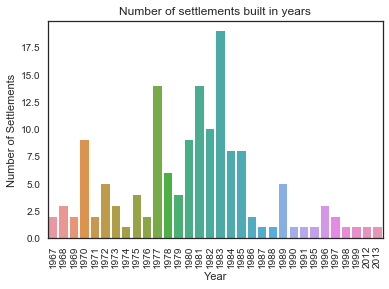

In [185]:
_ = sns.countplot(x='year_established', data=df)
plt.xticks(rotation=90)
plt.title('Number of settlements built in years')
plt.xlabel('Year')
plt.ylabel('Number of Settlements')
plt.show()

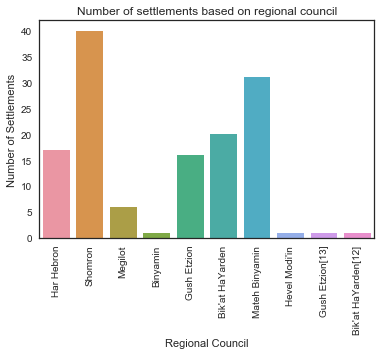

In [186]:
_ = sns.countplot(x='regional_council', data=df)
plt.xticks(rotation=90)
plt.title('Number of settlements based on regional council')
plt.xlabel('Regional Council')
plt.ylabel('Number of Settlements')
plt.show()

In [187]:
df.max()

year_established     2013.0000
latitude               32.4803
longitude              35.5333
2015                64179.0000
2010                48639.0000
2005                30484.0000
2000                37934.0000
dtype: float64

In [188]:
df[df["year_established"] == df["year_established"].max()]

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
116,Rechelim,2013,Shomron,32.1029,35.2572,NaN,583.0,NaN,NaN,NaN


In [189]:
df[df[2015] == df[2015].max()]

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
93,Modi'in Illit,1996,Mateh Binyamin,31.9306,35.0417,West,64179.0,48639.0,30484.0,16400.0


In [190]:
df.min()

year_established    1967.0000
latitude              31.3558
longitude             34.9029
2015                  85.0000
2010                  52.0000
2005                   0.0000
2000                  52.0000
dtype: float64

In [191]:
df[df["year_established"] == df["year_established"].min()]

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
23,East Talpiot,1967,NaN,31.750,35.2350,West (East Jerusalem),NaN,NaN,NaN,12845.0
65,Kfar Etzion,1967,Gush Etzion,31.649,35.1154,West,1071.0,804.0,422.0,427.0


In [192]:
df[df[2015] == df[2015].min()]


,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
102,Niran,1977,Bik'at HaYarden,31.9669,35.4543,East (Jordan Valley),85.0,52.0,49.0,56.0


In [193]:
df[df[2010] == df[2010].min()]


,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
102,Niran,1977,Bik'at HaYarden,31.9669,35.4543,East (Jordan Valley),85.0,52.0,49.0,56.0


In [194]:
df[df[2005] == df[2005].min()]

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
34,Ganim,1983,Shomron,32.4501,35.3378,East,NaN,NaN,0.0,158.0
54,Homesh,1980,Shomron,32.3081,35.1926,East,NaN,NaN,0.0,159.0
57,Kadim,1983,Shomron,32.4492,35.3200,East,NaN,NaN,0.0,148.0


In [195]:
df[df[2000] == df[2000].min()]

,name,year_established,regional_council,latitude,longitude,west_bank_barrier,2015,2010,2005,2000
123,Sa-Nur,1982,Shomron,32.3371,35.2019,East,NaN,NaN,NaN,52.0


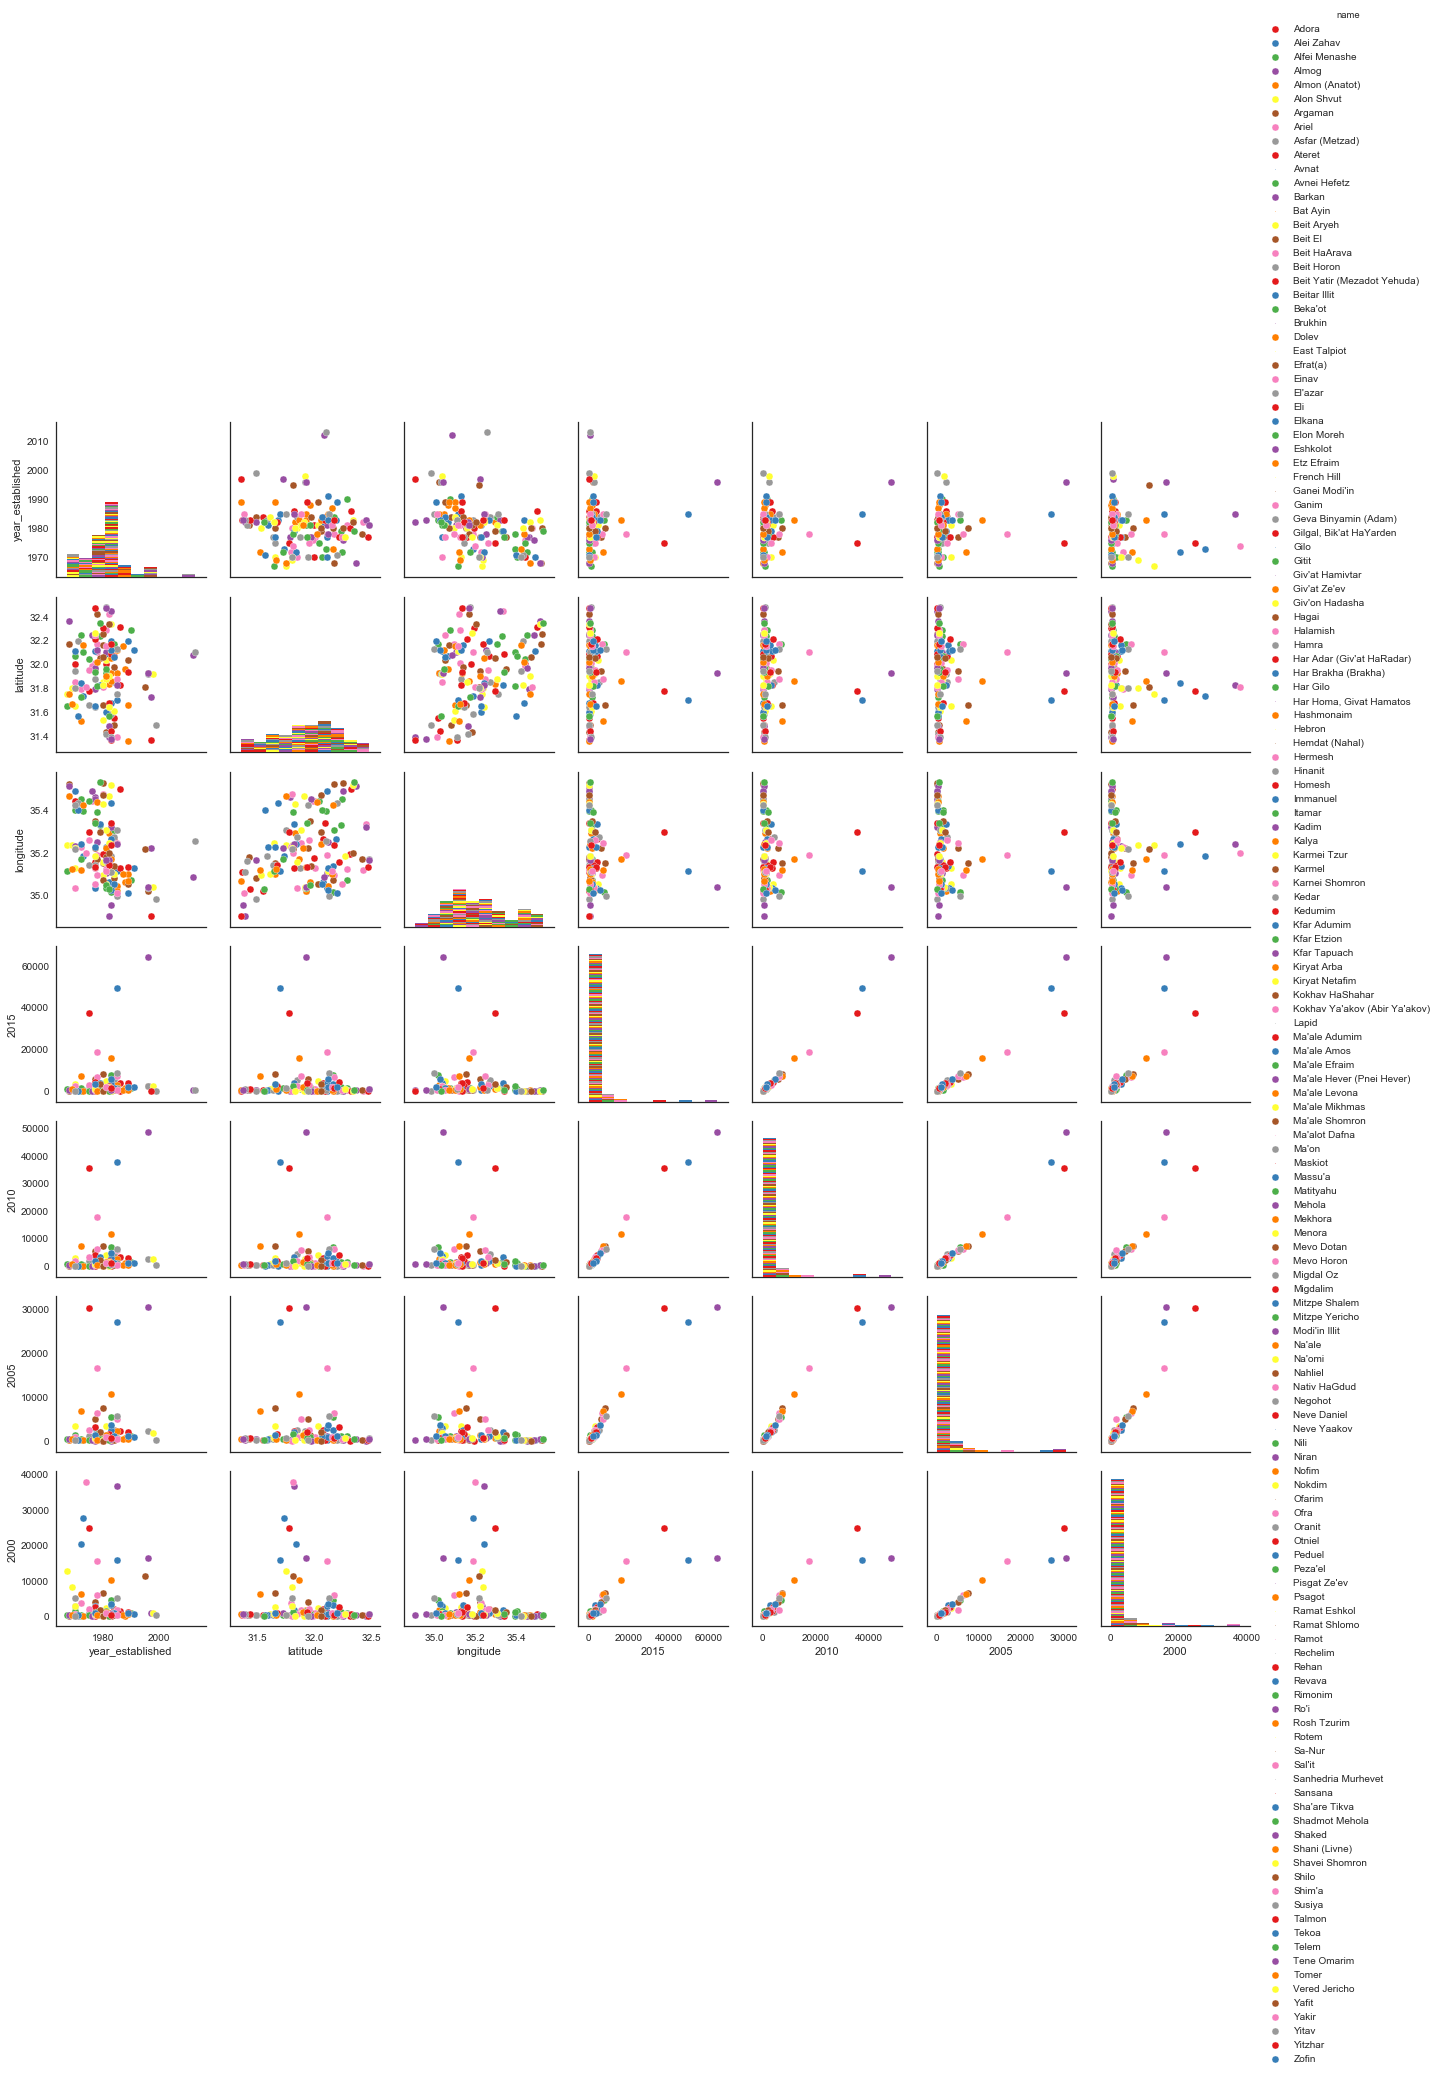

In [154]:
sns.pairplot(df,hue='name',palette='Set1')


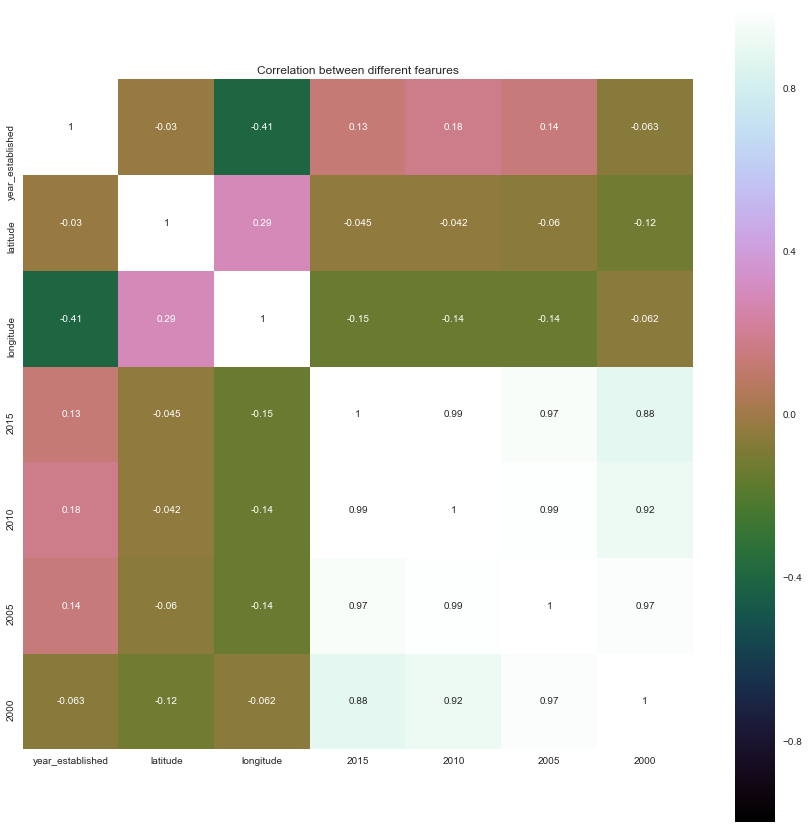

In [196]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()


the data set contains at most four data point of population size for each settlement, we will use linear regression to predict the population size for each settlement since the year it was established.
We will plot the predicted results on an animated map.

## Predicting Population Size


Assuming the population grows at an exponential rate, and we will model it using a linear regression fitted on the logarithm of the given population size.will model the population size as follows:
### log(population)=β0+β1∗isSettlement1+…+βn∗isSettlementn+βn+1∗yearsSinceEstablished

In [197]:
#unroll population per year
df_population = pd.melt(df, id_vars=['name','year_established'], value_vars=list(year_mapping.values()),
                        var_name='year',value_name='population')
df_population.dropna(inplace=True)
df_population = df_population[df_population.population>0]
df_population['years_since_established'] = (df_population.year - df_population['year_established']).astype(int)
df_population['log_population'] = df_population.population.apply(np.log)
df_population.head()

,name,year_established,year,population,years_since_established,log_population
0,Adora,1984,2015,404.0,31,6.001415
1,Alei Zahav,1982,2015,1300.0,33,7.170120
2,Alfei Menashe,1983,2015,7638.0,32,8.940891
3,Almog,1977,2015,207.0,38,5.332719
4,Almon (Anatot),1982,2015,1286.0,33,7.159292


In [198]:
#linear regression to estimate the log population since establishment
import statsmodels.formula.api as smf
clean =df.dropna()
clean = clean.reindex(columns=['name', 'year_established', 'regional_council', 'latitude', 'longitude', 'west_bank_barrier', '2015','2010','2005','2000'])
X = clean [['year_established' , '2010', '2005', '2000']]
y = clean['2015']

print(X.shape)
print(y.shape)

mod = smf.ols(formula='log_population ~ name + years_since_established', data=df_population)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:         log_population   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 20 May 2017   Prob (F-statistic):          3.48e-229
Time:                        12:54:32   Log-Likelihood:                 67.835
No. Observations:                 507   AIC:                             156.3
Df Residuals:                     361   BIC:                             773.7
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [226]:
clean =df.dropna()
clean = clean.reindex(columns=['name', 'year_established', 'regional_council', 'latitude', 'longitude', 'west_bank_barrier', '2015','2010','2005','2000'])
X = clean [['year_established' , '2010', '2005', '2000']]
y = clean['2015']

print(X.shape)
print(y.shape)


(118, 4)
(118,)


In [199]:
END_YEAR = 2037

#predict population in every year
def predict(row):
    to_predict = []
    record = row[1]
    for year in np.arange(record['year_established'],END_YEAR+1,1):                    
        x = record.copy() 
        x['year'] = year
        x['years_since_established'] = year-x['year_established']
        to_predict.append(x)
    
    result_df = pd.DataFrame(to_predict)
    result_df['predicted_log_population'] = res.predict(result_df)
    result_df['predicted_population'] = result_df.predicted_log_population.apply(np.exp).apply(int)
    result_df = result_df.drop(['population','log_population'], 1)
    
    return result_df
              
predicted_df = []
for row in df_population.drop_duplicates('name').iterrows():
    predicted_df.append(predict(row))
    
df_predicted_population = pd.concat(predicted_df)
df_predicted_population[df_predicted_population.name=="Ma'ale Adumim"].tail()

,name,year_established,year,years_since_established,predicted_log_population,predicted_population
72,Ma'ale Adumim,1975,2033,58,11.338696,84010
72,Ma'ale Adumim,1975,2034,59,11.376960,87287
72,Ma'ale Adumim,1975,2035,60,11.415224,90691
72,Ma'ale Adumim,1975,2036,61,11.453487,94229
72,Ma'ale Adumim,1975,2037,62,11.491751,97904


In [200]:
END_YEAR = 2037

#predict population in every year
def predict(row):
    to_predict = []
    record = row[1]
    for year in np.arange(record['year_established'],END_YEAR+1,1):                    
        x = record.copy() 
        x['year'] = year
        x['years_since_established'] = year-x['year_established']
        to_predict.append(x)
    
    result_df = pd.DataFrame(to_predict)
    result_df['predicted_log_population'] = res.predict(result_df)
    result_df['predicted_population'] = result_df.predicted_log_population.apply(np.exp).apply(int)
    result_df = result_df.drop(['population','log_population'], 1)
    
    return result_df
              
predicted_df = []
for row in df_population.drop_duplicates('name').iterrows():
    predicted_df.append(predict(row))
    
df_predicted_population = pd.concat(predicted_df)
df_predicted_population[df_predicted_population.name=="Beit El"].tail()

,name,year_established,year,years_since_established,predicted_log_population,predicted_population
15,Beit El,1977,2033,56,9.519849,13627
15,Beit El,1977,2034,57,9.558113,14159
15,Beit El,1977,2035,58,9.596377,14711
15,Beit El,1977,2036,59,9.634641,15285
15,Beit El,1977,2037,60,9.672904,15881


In [201]:
END_YEAR = 2037

#predict population in every year
def predict(row):
    to_predict = []
    record = row[1]
    for year in np.arange(record['year_established'],END_YEAR+1,1):                    
        x = record.copy() 
        x['year'] = year
        x['years_since_established'] = year-x['year_established']
        to_predict.append(x)
    
    result_df = pd.DataFrame(to_predict)
    result_df['predicted_log_population'] = res.predict(result_df)
    result_df['predicted_population'] = result_df.predicted_log_population.apply(np.exp).apply(int)
    result_df = result_df.drop(['population','log_population'], 1)
    
    return result_df
              
predicted_df = []
for row in df_population.drop_duplicates('name').iterrows():
    predicted_df.append(predict(row))
    
df_predicted_population = pd.concat(predicted_df)
df_predicted_population[df_predicted_population.name=="Beitar Illit"].tail()

,name,year_established,year,years_since_established,predicted_log_population,predicted_population
19,Beitar Illit,1985,2033,48,11.278691,79117
19,Beitar Illit,1985,2034,49,11.316955,82203
19,Beitar Illit,1985,2035,50,11.355219,85410
19,Beitar Illit,1985,2036,51,11.393483,88741
19,Beitar Illit,1985,2037,52,11.431747,92202


In [225]:
predicted_df = []
for row in df_population.drop_duplicates('name').iterrows():
    predicted_df.append(predict(row))
    
df_predicted_population = pd.concat(predicted_df)
df_predicted_population[df_predicted_population.name=="Modi'in Illit"].tail()

,name,year_established,year,years_since_established,predicted_log_population,predicted_population
93,Modi'in Illit,1996,2033,37,11.448629,93772
93,Modi'in Illit,1996,2034,38,11.486893,97430
93,Modi'in Illit,1996,2035,39,11.525157,101230
93,Modi'in Illit,1996,2036,40,11.563421,105179
93,Modi'in Illit,1996,2037,41,11.601684,109281


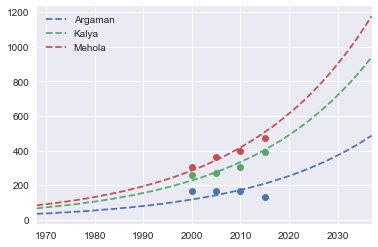

In [202]:
sns.set_style("darkgrid")


#plot predicted values
def plot_population(name):
    #plot predicted
    tmp_df = df_predicted_population[df_predicted_population.name==name]
    ax, = plt.plot(tmp_df.year,tmp_df.predicted_population,'--',label=name)
    
    #plot true values
    tmp_df = df_population[df_population.name==name]
    plt.plot(tmp_df.year,tmp_df.population,'o',color=ax.get_color(),label='')
    
    plt.legend(loc='upper left')
    
for name in df[df.year_established==1968].name:
    plot_population(name)
    
plt.xlim((1968,END_YEAR));

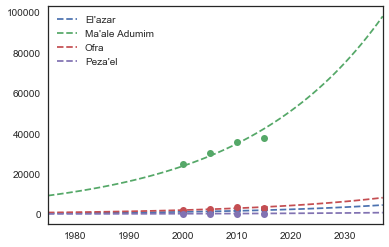

In [222]:
for name in df[df.year_established==1975].name:
    plot_population(name)
    
plt.xlim((1975,END_YEAR));


In [215]:
#add latitude and logitude to df
df_predicted_population_with_loc = pd.merge(df_predicted_population,
                                            df[['name','latitude','longitude']],on='name',how='left')

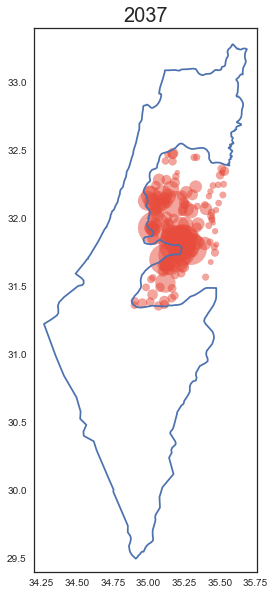

In [204]:

map_points = [[(34.998855590820305, 32.00000000000001),  (35.00000000000001, 31.997425079345657),  (35.00324249267578, 31.990127563476527),  (35.0, 31.984212875366186),  (34.989559173583984, 31.965164184570302),  (34.99199676513672, 31.942506790161048),  (35.0, 31.93330955505364),  (35.00731658935547, 31.92490005493163),  (35.03014755249023, 31.909357070922898),  (35.03498840332031, 31.893339157104464),  (35.02613830566406, 31.869981765747085),  (35.0, 31.865997314453047),  (34.97622299194336, 31.86237144470206),  (34.96389389038086, 31.846788406371985),  (34.972240447998054, 31.82001495361334),  (34.99156188964844, 31.812942504882837),  (35.0, 31.811902999877905),  (35.019195556640625, 31.809539794921925),  (35.044673919677734, 31.817346572875994),  (35.063453674316406, 31.834758758544908),  (35.08250427246094, 31.8443851470947),  (35.10449981689454, 31.826997756957994),  (35.12461853027344, 31.818763732910227),  (35.16779708862305, 31.803888320922788),  (35.214202880859375, 31.804109573364364),  (35.232418060302734, 31.787845611572358),  (35.22941207885742, 31.751674652099624),  (35.217594146728516, 31.73588180541993),  (35.167198181152344, 31.734746932983445),  (35.12457275390625, 31.71986007690432),  (35.07230758666992, 31.675645828247134),  (35.0455207824707, 31.664865493774375),  (35.02543640136718, 31.656375885009677),  (35.00883483886719, 31.64399337768551),  (34.99999999999999, 31.635826110839833),  (34.978328704833984, 31.615791320800838),  (34.96469497680664, 31.596309661865227),  (34.9537353515625, 31.583011627197283),  (34.9449462890625, 31.54544067382812),  (34.949275970458984, 31.504684448242198),  (34.94555664062499, 31.487272262573285),  (34.92554473876953, 31.454717636108427),  (34.90339660644531, 31.430171966552713),  (34.88394546508789, 31.396694183349595),  (34.886653900146484, 31.37677192687986),  (34.89789962768555, 31.361217498779368),  (34.91394042968751, 31.34979248046875),  (34.93878555297851, 31.34410858154293),  (34.98418045043945, 31.34921264648442),  (35.0, 31.352600097656275),  (35.02610778808594, 31.358192443847663),  (35.06697082519531, 31.355247497558526),  (35.12466049194336, 31.352067947387734),  (35.14576721191406, 31.361463546752944),  (35.15965270996094, 31.358715057372955),  (35.18129348754883, 31.361921310424837),  (35.199989318847656, 31.36329078674316),  (35.224037170410156, 31.367177963256797),  (35.23873901367188, 31.374729156494173),  (35.26790237426758, 31.400365829467777),  (35.29280471801757, 31.42439460754401),  (35.325172424316406, 31.43672943115231),  (35.35837173461914, 31.45753097534189),  (35.393741607666016, 31.48427391052246),  (35.409534454345696, 31.48905754089359),  (35.47558593750001, 31.48824119567879),  (35.47505569458008, 31.419759750366296),  (35.47150802612305, 31.3996105194092),  (35.45506286621094, 31.359333038329996),  (35.41720962524414, 31.300991058349585),  (35.40566635131836, 31.280853271484403),  (35.39493942260742, 31.264606475830067),  (35.389808654785156, 31.24445533752441),  (35.40121841430664, 31.223129272460938),  (35.44584655761718, 31.171499252319332),  (35.453792572021484, 31.15682029724118),  (35.458782196044915, 31.135959625244073),  (35.45978927612305, 31.1203765869141),  (35.453033447265625, 31.09472846984866),  (35.446842193603516, 31.07641029357903),  (35.4208869934082, 31.04140281677248),  (35.40858840942383, 31.02561187744146),  (35.4045295715332, 31.005224227905362),  (35.406875610351555, 30.988950729370153),  (35.415061950683594, 30.969457626342763),  (35.41499710083008, 30.948833465576172),  (35.39765930175781, 30.93511199951174),  (35.3600959777832, 30.913856506347706),  (35.3333740234375, 30.863014221191484),  (35.33306121826172, 30.84490776062014),  (35.338069915771484, 30.828399658203086),  (35.33297348022461, 30.80823516845702),  (35.31382751464844, 30.802299499511793),  (35.2989158630371, 30.78672790527342),  (35.29010772705078, 30.765878677368093),  (35.29002380371094, 30.72507858276369),  (35.27589797973633, 30.69666671752928),  (35.25141525268554, 30.657943725585845),  (35.24607467651367, 30.635709762573317),  (35.231201171875, 30.623798370361335),  (35.20170211791993, 30.574522018432546),  (35.19929504394531, 30.55801582336427),  (35.17667770385743, 30.467229843139624),  (35.16977310180665, 30.449346542358416),  (35.15599060058593, 30.432151794433608),  (35.15201187133789, 30.418622970581023),  (35.163379669189446, 30.40073776245116),  (35.18663024902343, 30.362215042114194),  (35.191902160644524, 30.34662246704103),  (35.188716888427734, 30.334699630737283),  (35.16647720336915, 30.313375473022383),  (35.160118103027344, 30.296178817749063),  (35.16353988647461, 30.276227951049815),  (35.14447784423828, 30.239534378051783),  (35.175811767578125, 30.119136810302713),  (35.09844589233399, 30.022563934326172),  (35.0919189453125, 29.999999999999964),  (35.07761001586914, 29.95053100585933),  (35.08076858520508, 29.872314453125053),  (35.051280975341804, 29.820911407470767),  (35.04681396484375, 29.802097320556598),  (35.049713134765625, 29.787187576293878),  (35.046821594238274, 29.766998291015618),  (35.029747009277344, 29.705041885375945),  (35.029762268066406, 29.671318054199165),  (35.032398223876946, 29.650213241577145),  (35.032669067382805, 29.6307125091553),  (35.019535064697266, 29.616704940795877),  (35.00167846679688, 29.60521507263188),  (35.0, 29.60351753234862),  (34.98645782470703, 29.589824676513675),  (34.975704193115234, 29.570997238159187),  (34.96632385253906, 29.547601699829112),  (34.95584869384765, 29.54901504516603),  (34.94356918334961, 29.535886764526456),  (34.94175338745118, 29.530830383300707),  (34.92712020874024, 29.516544342040948),  (34.92530822753906, 29.511487960815405),  (34.91800308227538, 29.50273704528802),  (34.911216735839844, 29.49664497375485),  (34.88545227050781, 29.52266502380371),  (34.872283935546875, 29.544435501098615),  (34.86752700805664, 29.561174392700163),  (34.863529205322266, 29.59030342102052),  (34.87293624877929, 29.61762428283696),  (34.87761306762695, 29.644935607910185),  (34.873111724853516, 29.663740158081016),  (34.85518264770508, 29.69100189208977),  (34.855873107910156, 29.73917961120612),  (34.753589630126946, 29.989412307739315),  (34.75503158569336, 29.999999999999964),  (34.755653381347656, 30.004556655883725),  (34.72322463989257, 30.082439422607425),  (34.637123107910156, 30.29404830932611),  (34.61674118041992, 30.36046791076654),  (34.546958923339844, 30.400077819824244),  (34.544422149658196, 30.43079185485837),  (34.565093994140625, 30.481323242187468),  (34.521690368652344, 30.525381088256786),  (34.52458572387695, 30.579957962036204),  (34.49564743041992, 30.684129714965835),  (34.407588958740234, 30.843908309936484),  (34.35051727294922, 30.987976074218746),  (34.268009185791016, 31.22360610961913),  (34.31301498413087, 31.25259780883785),  (34.357521057128906, 31.285615921020522),  (34.368568420410156, 31.30300521850595),  (34.36832809448242, 31.32993698120117),  (34.36582565307617, 31.358774185180668),  (34.37456893920898, 31.38384056091301),  (34.407901763916016, 31.4206085205078),  (34.45247650146484, 31.457437515258796),  (34.508235931396484, 31.503932952880895),  (34.53738784790039, 31.509868621826232),  (34.54627227783203, 31.523382186889684),  (34.5461311340332, 31.542613983154297),  (34.532524108886705, 31.559844970703097),  (34.489463806152344, 31.594066619873093),  (34.49972915649414, 31.607353210449265),  (34.55429077148437, 31.677579879760795),  (34.57070541381836, 31.701047897338835),  (34.57871627807617, 31.70453071594236),  (34.577735900878906, 31.711059570312518),  (34.57758331298828, 31.71208572387703),  (34.590042114257805, 31.7291107177734),  (34.640228271484375, 31.815710067749016),  (34.64800262451172, 31.830299377441474),  (34.69375228881835, 31.922323226928633),  (34.70440673828125, 31.93497467041019),  (34.70681762695313, 31.9356727600098),  (34.70625305175781, 31.939794540405277),  (34.72503662109375, 31.982484817504805),  (34.7307243347168, 32.00000000000001),  (34.73309326171876, 32.004558563232386),  (34.73419189453125, 32.019958496093764),  (34.74451828002929, 32.04944992065428),  (34.74897766113281, 32.056949615478516),  (34.75548934936524, 32.06108093261713),  (34.759002685546875, 32.066020965576215),  (34.769859313964844, 32.09484481811527),  (34.77038574218751, 32.09623718261724),  (34.78449249267578, 32.12059020996091),  (34.78816604614258, 32.14387893676757),  (34.79983139038086, 32.17960357666017),  (34.801429748535156, 32.20144271850588),  (34.806209564208984, 32.21353912353522),  (34.80760955810547, 32.215236663818324),  (34.820430755615234, 32.23078155517575),  (34.82257843017579, 32.236362457275455),  (34.83061599731445, 32.27516937255865),  (34.843528747558594, 32.30818557739251),  (34.846675872802734, 32.3349227905274),  (34.84770202636718, 32.34364700317381),  (34.8607292175293, 32.3693313598633),  (34.86852264404297, 32.3918495178222),  (34.88310623168945, 32.4464797973632),  (34.886417388916016, 32.455787658691335),  (34.89236068725586, 32.47248840332035),  (34.89585494995117, 32.500362396240234),  (34.91240310668946, 32.5543746948242),  (34.9176025390625, 32.578647613525376),  (34.92914962768554, 32.63247680664059),  (34.93632125854492, 32.657493591308565),  (34.936485290527344, 32.698558807373075),  (34.93931198120117, 32.70230484008786),  (34.94768524169922, 32.713394165038984),  (34.95354461669922, 32.72666931152337),  (34.95812606811524, 32.7775192260742),  (34.963382720947266, 32.808898925781335),  (34.96281814575195, 32.8205795288085),  (34.96426773071288, 32.82466888427733),  (34.96520233154297, 32.8273124694824),  (34.97179794311523, 32.83120727539053),  (34.98124694824219, 32.832214355468686),  (34.98563003540039, 32.836952209472656),  (34.99266052246094, 32.83741760253904),  (35.00000000000001, 32.83182525634758),  (35.0090217590332, 32.824432373046875),  (35.01562499999999, 32.81685638427741),  (35.02008819580078, 32.81425094604491),  (35.02635955810547, 32.81354522705073),  (35.03412628173828, 32.81563949584952),  (35.05250930786133, 32.82840728759763),  (35.060585021972656, 32.835556030273516),  (35.07079315185547, 32.8492012023926),  (35.073184967041016, 32.85395050048825),  (35.08196258544922, 32.87136077880862),  (35.08755111694336, 32.89104461669921),  (35.09027099609375, 32.90834045410158),  (35.08626937866211, 32.9183044433594),  (35.07870864868164, 32.91736602783201),  (35.0756721496582, 32.91841125488286),  (35.07475280761718, 32.92067718505853),  (35.08096694946288, 32.96171569824216),  (35.08271408081055, 32.967414855956974),  (35.10194778442383, 33.03008651733402),  (35.11440658569335, 33.07775497436524),  (35.11545944213867, 33.090179443359375),  (35.149497985839844, 33.09042739868161),  (35.17575454711914, 33.09230804443361),  (35.1810073852539, 33.09268188476563),  (35.21642303466796, 33.08750152587889),  (35.219905853271484, 33.088768005371115),  (35.22564697265625, 33.09401321411129),  (35.237213134765625, 33.09716415405272),  (35.274234771728516, 33.098209381103466),  (35.31272888183594, 33.102733612060625),  (35.32072067260742, 33.10115432739254),  (35.332542419433594, 33.098819732665916),  (35.34935760498046, 33.071868896484325),  (35.358776092529304, 33.062786102295),  (35.37384414672852, 33.05526733398445),  (35.37963104248047, 33.05385589599614),  (35.405067443847656, 33.0634117126464),  (35.43250274658203, 33.065238952636754),  (35.4397087097168, 33.06845474243158),  (35.456783294677734, 33.08231353759769),  (35.461700439453125, 33.0879783630371),  (35.46991729736328, 33.09305953979484),  (35.47425842285156, 33.093429565429766),  (35.49186706542969, 33.08987426757817),  (35.50879287719727, 33.09523773193351),  (35.511138916015625, 33.09760665893548),  (35.5118293762207, 33.104164123535135),  (35.512470245361335, 33.11026000976556),  (35.51473617553712, 33.114459991455156),  (35.533782958984375, 33.12126159667961),  (35.53878402709961, 33.13128280639646),  (35.54080200195312, 33.15312576293945),  (35.54707336425781, 33.177402496337876),  (35.55347442626953, 33.18677902221677),  (35.55842971801758, 33.19794082641605),  (35.557613372802734, 33.210067749023466),  (35.55622100830079, 33.21532058715822),  (35.55399703979492, 33.2237129211426),  (35.554466247558594, 33.2315216064453),  (35.56301498413085, 33.247844696044844),  (35.56884002685547, 33.251926422119105),  (35.578208923339844, 33.262313842773466),  (35.58779525756836, 33.280044555664034),  (35.59016036987304, 33.2821807861328),  (35.59720230102538, 33.27735900878903),  (35.620853424072266, 33.24897766113283),  (35.62472152709961, 33.24795150756838),  (35.62841415405273, 33.250934600830114),  (35.63676071166992, 33.24431610107427),  (35.64419937133788, 33.242824554443374),  (35.651634216308594, 33.24443054199221),  (35.66475677490235, 33.250339508056626),  (35.67073822021484, 33.250984191894545),  (35.6833610534668, 33.249538421630916),  (35.68907928466797, 33.24673080444337),  (35.690010070800774, 33.244125366210916),  (35.68144989013672, 33.22746658325201),  (35.676532745361335, 33.211837768554766),  (35.67584228515625, 33.19003677368156),  (35.67729949951172, 33.179275512695256),  (35.677650451660156, 33.17667770385739),  (35.6824951171875, 33.15928649902339),  (35.68238067626953, 33.15252304077156),  (35.678680419921875, 33.14036941528319),  (35.66377639770508, 33.106895446777344),  (35.66104888916015, 33.085029602050746),  (35.660728454589844, 33.05903625488283),  (35.657833099365234, 33.06188964843756),  (35.647056579589844, 33.05915069580078),  (35.64235687255859, 33.054531097412124),  (35.63204956054688, 33.03793334960939),  (35.615638732910156, 33.02412414550783),  (35.615982055664055, 33.01943588256833),  (35.627540588378906, 33.0011100769043),  (35.62923812866211, 32.97801208496092),  (35.627532958984375, 32.95823287963874),  (35.62482070922852, 32.92675018310537),  (35.62274932861328, 32.918205261230526),  (35.61697006225587, 32.907363891601634),  (35.61665344238281, 32.902194976806655),  (35.61874771118164, 32.897903442382805),  (35.62332534790039, 32.895755767822266),  (35.63081741333008, 32.89851379394527),  (35.63502502441406, 32.89245605468749),  (35.643802642822266, 32.88447570800782),  (35.656837463378906, 32.86299133300775),  (35.66119003295899, 32.85349655151368),  (35.663917541503906, 32.83753585815437),  (35.66199493408203, 32.822463989257756),  (35.65496063232422, 32.79989624023432),  (35.65401077270508, 32.78077316284179),  (35.65314865112305, 32.763507843017564),  (35.65011215209961, 32.74599456787104),  (35.63890075683593, 32.72616195678714),  (35.61994552612305, 32.709865570068274),  (35.619625091552734, 32.70790863037102),  (35.62686920166015, 32.70355224609375),  (35.646038055419915, 32.6962471008301),  (35.64886474609375, 32.69358444213875),  (35.64941024780274, 32.68729782104493),  (35.62122344970703, 32.67691802978522),  (35.61473464965821, 32.67065048217778),  (35.6165657043457, 32.656562805175795),  (35.60526657104492, 32.652778625488224),  (35.605735778808594, 32.646663665771534),  (35.60330581665038, 32.64425659179684),  (35.594463348388665, 32.64217376708986),  (35.579998016357415, 32.63289642333979),  (35.57866668701172, 32.62262725830077),  (35.58181381225586, 32.61951828002934),  (35.58033370971679, 32.60464859008799),  (35.582630157470696, 32.60004806518548),  (35.58308410644531, 32.599834442138665),  (35.59004592895508, 32.59660720825202),  (35.59163665771485, 32.592430114746136),  (35.591995239257805, 32.59037780761722),  (35.58726119995117, 32.581058502197166),  (35.58659362792969, 32.57164382934564),  (35.596866607666016, 32.553634643554666),  (35.59587478637695, 32.55154037475589),  (35.58585357666015, 32.551681518554695),  (35.584102630615234, 32.542228698730455),  (35.579498291015625, 32.542312622070334),  (35.57366943359376, 32.54556274414057),  (35.57154846191406, 32.54457855224611),  (35.57218551635743, 32.538639068603494),  (35.57893753051757, 32.52941513061526),  (35.57673263549804, 32.52624130249019),  (35.5666389465332, 32.5244483947754),  (35.561302185058594, 32.51807403564451),  (35.56601333618164, 32.515056610107386),  (35.57246780395507, 32.515201568603615),  (35.578857421875, 32.50284576416014),  (35.58631896972656, 32.50027847290047),  (35.58824920654297, 32.497585296630845),  (35.5870246887207, 32.492477416992244),  (35.58105087280274, 32.48277664184566),  (35.574691772460945, 32.47363662719729),  (35.573833465576165, 32.46856689453125),  (35.57538986206055, 32.46403503417976),  (35.58365249633789, 32.46063232421872),  (35.585693359375, 32.457260131835966),  (35.583206176757805, 32.452369689941385),  (35.5783462524414, 32.45221328735345),  (35.57494735717773, 32.449584960937486),  (35.57742309570312, 32.43637084960933),  (35.56566619873047, 32.433246612548785),  (35.56856155395508, 32.4106521606445),  (35.56683349609375, 32.40693283081053),  (35.559349060058594, 32.40508651733395),  (35.5583381652832, 32.40345001220703),  (35.56786346435547, 32.389778137207),  (35.56120681762695, 32.39031600952151),  (35.559730529785156, 32.390434265136705),  (35.53650665283203, 32.396102905273445),  (35.50706100463867, 32.40775299072271),  (35.49448013305664, 32.41101074218752),  (35.47173690795898, 32.4118690490722),  (35.45676803588867, 32.408168792724666),  (35.44425964355469, 32.40981674194328),  (35.43753814697266, 32.4148674011231),  (35.437847137451165, 32.41991806030269),  (35.43073272705078, 32.427703857421925),  (35.43037033081055, 32.42860794067379),  (35.4249267578125, 32.442176818847635),  (35.426170349121094, 32.4621543884277),  (35.42301559448242, 32.48359298706053),  (35.40678787231445, 32.50688934326175),  (35.390613555908196, 32.51712036132813),  (35.38214111328126, 32.518898010253906),  (35.36290740966796, 32.51916503906248),  (35.36038589477539, 32.518775939941314),  (35.31400680541992, 32.511547088623125),  (35.3023681640625, 32.51160812377922),  (35.29443359375001, 32.513397216796875),  (35.278690338134766, 32.519962310791065),  (35.26333999633789, 32.529518127441314),  (35.245529174804695, 32.54517364501962),  (35.23168182373047, 32.55156707763675),  (35.22804641723633, 32.55109405517572),  (35.22199249267579, 32.5503120422363),  (35.2166862487793, 32.54806137084955),  (35.19832229614257, 32.53045654296868),  (35.194828033447266, 32.52437591552733),  (35.182857513427734, 32.514556884765724),  (35.16315841674804, 32.50239944458002),  (35.138248443603516, 32.491653442382834),  (35.10839080810546, 32.48207855224609),  (35.0980339050293, 32.47875213623044),  (35.0904312133789, 32.47389221191403),  (35.08116149902343, 32.4591178894043),  (35.076725006103516, 32.44520568847659),  (35.07206344604493, 32.41959381103513),  (35.063362121582024, 32.39910888671874),  (35.05923843383789, 32.373748779296854),  (35.055809020996094, 32.37092971801768),  (35.052234649658196, 32.367992401123026),  (35.02625656127929, 32.35810089111323),  (35.01959228515625, 32.35098266601567),  (35.009002685546875, 32.33402252197264),  (35.007877349853516, 32.3070755004883),  (35.012577056884766, 32.27845764160163),  (35.00926208496094, 32.27102661132817),  (35.000816345214844, 32.265899658203075),  (35.0, 32.26489639282227),  (34.98706817626954, 32.249004364013764),  (34.98060989379882, 32.23659896850594),  (34.96897888183594, 32.214244842529205),  (34.967273712158196, 32.20257568359366),  (34.96772384643555, 32.19096755981452),  (34.98134994506837, 32.17361450195311),  (34.986759185791016, 32.1639823913574),  (34.99433135986329, 32.1354484558106),  (34.99554443359375, 32.1226387023925),  (34.99423599243163, 32.118328094482415),  (34.99235534667969, 32.112155914306726),  (34.984233856201165, 32.099086761474624),  (34.98310470581055, 32.09110260009764),  (34.98623657226562, 32.08446502685554),  (34.99666213989258, 32.07497024536139),  (35.00000000000001, 32.069557189941484),  (35.008155822753906, 32.056335449218686),  (35.01147460937499, 32.044807434082074),  (35.00916290283203, 32.03006744384759),  (35.00112152099609, 32.01516723632821),  (35.00137710571289, 32.00844955444331),  (35.003292083740234, 32.003055572509815),  (34.99999999999999, 32.000789642333956),  (34.998855590820305, 32.00000000000001)]]
import shapefile
from IPython import display
import time

sns.set_style("white")


for year in np.arange(1967, END_YEAR+1,1):
    # plot basic map
    plt.figure(figsize=(4,10))
    for shape in map_points:
        x,y = zip(*shape)
        plt.plot(x,y)

    # plot settlements
    curr_df = df_predicted_population_with_loc[df_predicted_population_with_loc['year']==year]
    plt.scatter(curr_df.longitude,curr_df.latitude,s = curr_df['predicted_population']**0.6,alpha =0.5,color='#e74c3c')
    plt.ylim((29.4,33.4))

    plt.title(year,fontsize=20)
    plt.show()
    

    time.sleep(0.01)
    
    if year<END_YEAR:
        display.clear_output(wait=True)

 